In [11]:
import mglearn
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import numpy as np

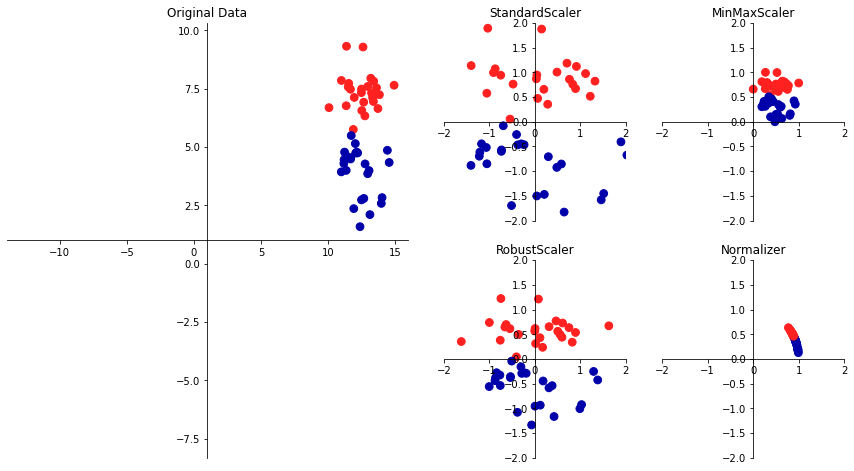

In [2]:
mglearn.plots.plot_scaling()

In [5]:
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    random_state=1)
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [7]:
scaler.fit(X_train)

MinMaxScaler()

In [12]:
# 变换数据
X_train_scaled = scaler.transform(X_train)

np.set_printoptions(suppress=True)
# 在缩放之前和之后分别打印数据集属性
print("transformed shape: {}".format(X_train_scaled.shape))
print("per-feature minimum before scaling:\n {}".format((X_train.min(axis=0))))
print("per-feature maximum before scaling:\n {}".format(X_train.max(axis=0)))
print("per-feature minimum after scaling:\n {}".format(
    X_train_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n {}".format(
    X_train_scaled.max(axis=0)))

transformed shape: (426, 30)
per-feature minimum before scaling:
 [  6.981       9.71       43.79      143.5         0.05263     0.01938
   0.          0.          0.106       0.05024     0.1153      0.3602
   0.757       6.802       0.001713    0.002252    0.          0.
   0.009539    0.0008948   7.93       12.02       50.41      185.2
   0.07117     0.02729     0.          0.          0.1566      0.05521  ]
per-feature maximum before scaling:
 [  28.11      39.28     188.5     2501.         0.1634     0.2867
    0.4268     0.2012     0.304      0.09575    2.873      4.885
   21.98     542.2        0.03113    0.1354     0.396      0.05279
    0.06146    0.02984   36.04      49.54     251.2     4254.
    0.2226     0.9379     1.17       0.291      0.5774     0.1486 ]
per-feature minimum after scaling:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
per-feature maximum after scaling:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1

In [13]:
# 对测试数据进行变换
X_test_scaled = scaler.transform(X_test)
# 在缩放之后打印测试数据的属性
print("per-feature minimum after scaling:\n{}".format(X_test_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n{}".format(X_test_scaled.max(axis=0)))

per-feature minimum after scaling:
[ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]
per-feature maximum after scaling:
[0.9578778  0.81501522 0.95577362 0.89353128 0.81132075 1.21958701
 0.87956888 0.9333996  0.93232323 1.0371347  0.42669616 0.49765736
 0.44117231 0.28371044 0.48703131 0.73863671 0.76717172 0.62928585
 1.33685792 0.39057253 0.89612238 0.79317697 0.84859804 0.74488793
 0.9154725  1.13188961 1.07008547 0.92371134 1.20532319 1.63068851]


In [15]:
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt

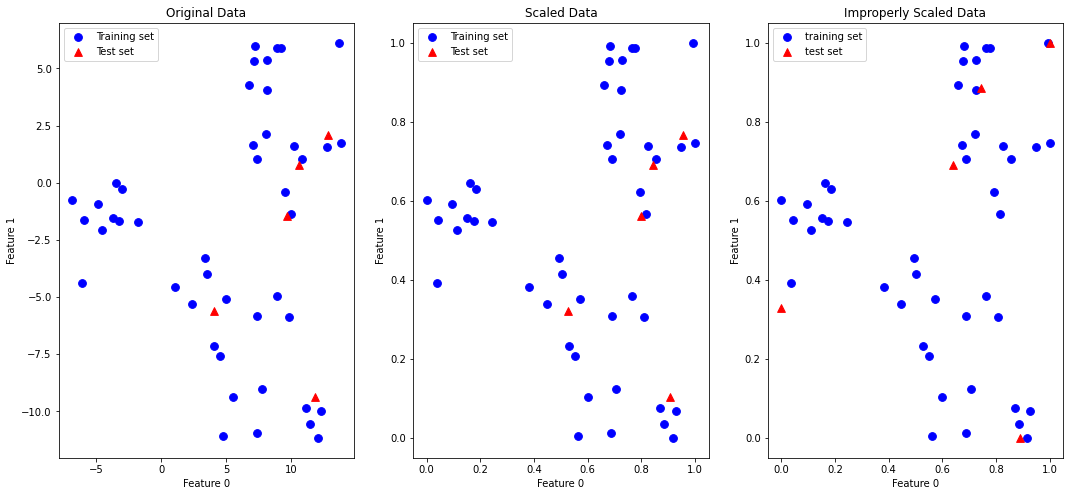

In [20]:
# 构造数据
X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)
# 将其分为训练集和测试集
X_train, X_test = train_test_split(X, random_state=5, test_size=.1)

# 绘制训练集和测试集
fig, axes = plt.subplots(1, 3, figsize=(18, 8))
axes[0].scatter(X_train[:, 0], X_train[:, 1],
                c='b', label="Training set", s=60)
axes[0].scatter(X_test[:, 0], X_test[:, 1], marker='^',
                c='r', label="Test set", s=60)
axes[0].legend(loc='upper left')
axes[0].set_title("Original Data")

# 利用MinMaxScaler缩放数据
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 将正确缩放的数据可视化
axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                c='b', label="Training set", s=60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker='^',
                c='r', label="Test set", s=60)
axes[1].set_title("Scaled Data")
axes[1].legend(loc='upper left')
# 单独对测试集进行缩放
# 使得测试集的最小值为0，最大值为1
# 千万不要这么做！这里只是为了举例
test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)

# 将错误缩放的数据可视化
axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                c='b', label="training set", s=60)
axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1],
                marker='^', c='r', label="test set", s=60)
axes[2].set_title("Improperly Scaled Data")

axes[2].legend(loc='upper left')

for ax in axes:
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# 依次调用fit和transform（使用方法链）
X_scaled = scaler.fit(X).transform(X)
# 结果相同，但计算更加高效
X_scaled_d = scaler.fit_transform(X)

In [25]:
print(X_scaled[:5],end='\n\n')
print(X_scaled_d[:5])

[[ 0.27456672 -1.69524589]
 [ 0.59380079  1.58996502]
 [-2.00055543  0.11687698]
 [ 1.12437041 -1.51036319]
 [-0.40859195 -0.20069066]]

[[ 0.27456672 -1.69524589]
 [ 0.59380079  1.58996502]
 [-2.00055543  0.11687698]
 [ 1.12437041 -1.51036319]
 [-0.40859195 -0.20069066]]


In [45]:
from sklearn.svm import SVC

In [54]:
%%time
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    random_state=0)

svm = SVC(C=0.8)
svm.fit(X_train, y_train)
print("Train set accuracy: {:.2f}".format(svm.score(X_train, y_train)))
print("Test set accuracy: {:.2f}".format(svm.score(X_test, y_test)))

Train set accuracy: 0.90
Test set accuracy: 0.92
Wall time: 20.9 ms


In [55]:
%%time
# 使用0-1缩放进行预处理
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 在缩放后的训练数据上学习SVM
svm.fit(X_train_scaled, y_train)

# 在缩放后的测试集上计算分数
print("Scaled train set accuracy: {:.2f}".format(svm.score(X_train_scaled, y_train)))
print("Scaled test set accuracy: {:.2f}".format(svm.score(X_test_scaled, y_test)))

Scaled train set accuracy: 0.98
Scaled test set accuracy: 0.97
Wall time: 17 ms


In [56]:
%%time
# 利用零均值和单位方差的缩放方法进行预处理
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 在缩放后的训练数据上学习SVM
svm.fit(X_train_scaled, y_train)

# 在缩放后的测试集上计算分数
print("SVM train accuracy: {:.2f}".format(svm.score(X_train_scaled, y_train)))
print("SVM test accuracy: {:.2f}".format(svm.score(X_test_scaled, y_test)))

SVM train accuracy: 0.98
SVM test accuracy: 0.97
Wall time: 19.9 ms
